# Tugas EDA + Model Klasifikasi

## Alur Notebook

Notebook ini pertama - tama akan melakukan EDA untuk mencari masalah - masalah yang ada di dataset, selanjutnya akan dicoba membuat model-model secara iteratif untuk setiap penanganan masalah dan mencatat kinerja tiap model

## Dataset

Dataset yang digunakan adalah Non-Performing Loan

Berikut attribut dataset dan penjelasannya:

X : Penomoran (index)

jumlah_kartu: Jumlah Kartu Kredit yang dimiliki nasabah

outstanding: Jumlah hutang yang harus dibayar oleh nasabah dalam Rupiah

limit_kredit: Batas kredit yang diberikan kepada nasabah oleh lembaga keuangan dalam Rupiah

tagihan : Total tagihan yang harus dibayar oleh nasabah pada periode tertentu misal perbulan

total_pemakaian_tunai : Total uang tunai yang ditarik dari kartu kredit

total_pemakaian_retail : Total Penggunaan kartu kredit untuk transaksi ritel

sisa_tagihan_tidak_terbayar: Jumlah tagihan yang belum terbayar oleh nasabah

kode_cabang : Kode yang mewakili cabang atau lokasi lembaga keuangan

rasio_pembayaran : Rasio Pembayaran tagihan terhadap tagihan total

persentasi_overlimit : Persentase penggunaan kartu kredit melebihi batas kredit

rasio_pembayaran_3bulan : Rasio pembayaran tagihan selama tiga bulan terakhir 

rasio_pembayaran_6bulan : Rasio pembayaran tagihan selama enam bulan terakhir

skor_delikuensi : Skor yang mengindikasikan resiko kredit nasabah

flag_kredit_macet : Ini merupakan kelas yang kita prediksi, apakah kredit macet atau tidak 0 untuk tidak macet dan 1 untuk macet

jumlah_tahun_sejak_pembukaan_kredit : Jumlah tahun sejak nasabah membuka kredit

total_pemakaian: Total penggunaan kartu kredit(termasuk tunai dan ritel)

sisa_tagihan_per_jumlah_kartu: Rata - rata sisa tagihan per jumlah kartu kredit

sisa_tagihan_per_limit: Rata-rata sisa tagihan per batas kredit

total_pemakaian_per_limit: Rata-rata total pemakaian per batas kredit

pemakaian_3bln_per_limit: Rata- rata pemakaian dalam tiga bulan terakhir 

pemakaian_6bln_per_limit: Rata- rata pemakaian dalam enam bulan terakhir per batas kredit

utilisasi_3bulan: Persentase pemakaian dalam tiga bulan terakhir

utilisasi_6bulan: Persentase pemakaian dalm enam bulan terakhir 

## Import Library Yang Diperlukan

In [1]:
# display
%matplotlib inline  
# numerik
import numpy as np 
# analisis
import pandas as pd 
# plot
import matplotlib.pyplot as plt  
# visualisasi
import seaborn as sns

## Membaca Data Train

In [2]:
df_train = pd.read_csv('npl_train.txt')

## Copy Data Original

Membuat salinan data latih (train) sehingga meskipun kita harus membuat perubahan apa pun pada set data ini, kita tidak akan kehilangan set data asli.

In [3]:
train_original = df_train.copy()

# Eksplorasi Data & Analisis

## Data Understanding

Pada bagian ini, kita akan melihat struktur dataset. Pertama, kita akan memeriksa fitur-fitur yang ada di data kita dan kemudian kita akan melihat tipe datany

In [4]:
df_train.columns

Index(['X', 'jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
       'total_pemakaian_tunai', 'total_pemakaian_retail',
       'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi', 'flag_kredit_macet',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan'],
      dtype='object')

Pertama kita lihat terlebih dahulu ada atribut apa saja di data ini bertipe apa , selanjutnya kita akan cek apakah ada null di dalam atribut -  atribut tersebut

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

## Print tipe data

In [6]:
df_train.dtypes

X                                        int64
jumlah_kartu                             int64
outstanding                              int64
limit_kredit                           float64
tagihan                                float64
total_pemakaian_tunai                  float64
total_pemakaian_retail                 float64
sisa_tagihan_tidak_terbayar            float64
kode_cabang                             object
rasio_pembayaran                       float64
persentasi_overlimit                   float64
rasio_pembayaran_3bulan                float64
rasio_pembayaran_6bulan                float64
skor_delikuensi                          int64
flag_kredit_macet                        int64
jumlah_tahun_sejak_pembukaan_kredit    float64
total_pemakaian                        float64
sisa_tagihan_per_jumlah_kartu          float64
sisa_tagihan_per_limit                 float64
total_pemakaian_per_limit              float64
pemakaian_3bln_per_limit               float64
pemakaian_6bl

## Dimensi dataset

In [7]:
print('Dimensi Training Data: ', df_train.shape)
df_train.head()

Dimensi Training Data:  (15493, 24)


,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


## Menampilkan Data NULL

In [8]:
df_train.isna().sum()

X                                        0
jumlah_kartu                             0
outstanding                              0
limit_kredit                             0
tagihan                                  0
total_pemakaian_tunai                    0
total_pemakaian_retail                   0
sisa_tagihan_tidak_terbayar              0
kode_cabang                            100
rasio_pembayaran                         0
persentasi_overlimit                     0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
skor_delikuensi                          0
flag_kredit_macet                        0
jumlah_tahun_sejak_pembukaan_kredit      0
total_pemakaian                          0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
total_pemakaian_per_limit                0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
utilisasi_3bulan                         0
utilisasi_6

Ternyata ada atribut yaitu kode_cabang yang bertipe objek dan ada 100 data yang null di atribut tersebut (Masalah 1)

### Mengecek Keseimbangan Data

In [9]:
df_train['flag_kredit_macet'].value_counts()

0    14134
1     1359
Name: flag_kredit_macet, dtype: int64

Ternyata ada ketimpangan data dimana ada lebih banyak record kredit tidak macet (Masalah 2)

### 

### Mencari Korelasi antar atribut

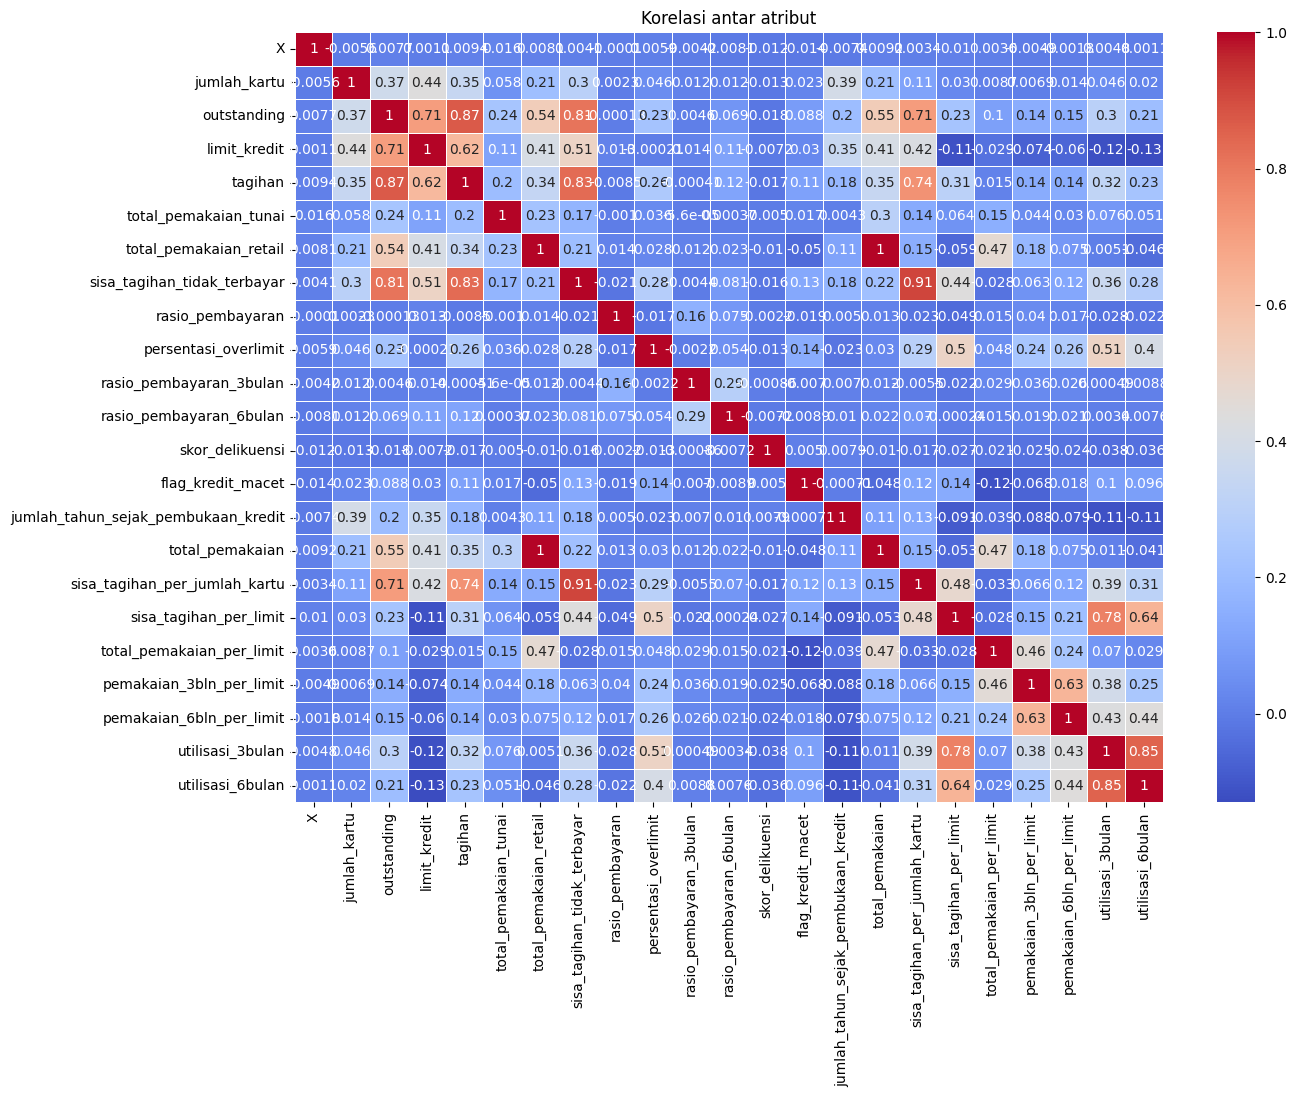

In [10]:
correlation_matrix = df_train.corr()

# Plot Heatmap Korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar=True)
plt.title('Korelasi antar atribut')
plt.show()

## 1. Membuat Model Awal hanya menangani tipe data categorical (one-hot encoding atau di drop)

### 1.A Menangani kode_cabang dengan one-hot encoding

In [11]:
x=df_train.drop("flag_kredit_macet", 1)
x.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [12]:
y=df_train[["flag_kredit_macet"]]
y.head(5)

,flag_kredit_macet
0,0
1,0
2,0
3,0
4,0


## One-hot encoding

In [13]:
x = pd.get_dummies(x)
x.head(5)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,...,kode_cabang_B,kode_cabang_C,kode_cabang_D,kode_cabang_E,kode_cabang_F,kode_cabang_G,kode_cabang_H,kode_cabang_I,kode_cabang_J,kode_cabang_K
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,102.19,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,100.00,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,100.00,0.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,95.99,0.0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# panggil fungsi train_test_split
# isi dengan parameter X, y, nilai test_size 0.2, dan random state 1
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.2,random_state=1)

## Melakukan Klasifikasi dengan Berbagai Model

### Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
acc = accuracy_score(y_cv, Y_pred)#buat skor akurasi dengan membandingkan hasil prediksi dengan data

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))

Akurasi 0.8789932236205228
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2821
           1       0.20      0.12      0.15       278

    accuracy                           0.88      3099
   macro avg       0.56      0.53      0.54      3099
weighted avg       0.85      0.88      0.86      3099

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Menyimpan Hasil Model

In [17]:
kolom_hasil = ['Model', 'Akurasi', 'Precision_0', 'Precision_1', 'Macro_Avg_Precision', 'Weighted_Avg_Precision', 'Recall_0', 'Recall_1', 'Macro_Avg_Recall', 'Weighted_Avg_Recall', 'F1_Score', 'Macro_Avg_F1', 'Weighted_Avg_F1']
hasil = pd.DataFrame(columns=kolom_hasil)


In [18]:
def extract_classification_metrics_to_dataframe(y_true, y_pred, model_name):
    # Generate the classification report
    classification_metrics = classification_report(y_true, y_pred, output_dict=True)
    
    # Extract the relevant metrics from the classification report
    akurasi = classification_metrics['accuracy']
    precision_0 = classification_metrics['0']['precision']
    precision_1 = classification_metrics['1']['precision']
    macro_avg_precision = classification_metrics['macro avg']['precision']
    weighted_avg_precision = classification_metrics['weighted avg']['precision']
    recall_0 = classification_metrics['0']['recall']
    recall_1 = classification_metrics['1']['recall']
    macro_avg_recall = classification_metrics['macro avg']['recall']
    weighted_avg_recall = classification_metrics['weighted avg']['recall']
    f1_score = classification_metrics['weighted avg']['f1-score']
    macro_avg_f1 = classification_metrics['macro avg']['f1-score']
    weighted_avg_f1 = classification_metrics['weighted avg']['f1-score']
    
    # Create a dictionary with the extracted metrics
    metrics_dict = {
        'Model': model_name,
        'Akurasi': akurasi,
        'Precision_0': precision_0,
        'Precision_1': precision_1,
        'Macro_Avg_Precision': macro_avg_precision,
        'Weighted_Avg_Precision': weighted_avg_precision,
        'Recall_0': recall_0,
        'Recall_1': recall_1,
        'Macro_Avg_Recall': macro_avg_recall,
        'Weighted_Avg_Recall': weighted_avg_recall,
        'F1_Score': f1_score,
        'Macro_Avg_F1': macro_avg_f1,
        'Weighted_Avg_F1': weighted_avg_f1
    }
    
    return metrics_dict





In [19]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, Y_pred, model_name = "NB_onehot_null"), ignore_index=True)


In [20]:
hasil

,Model,Akurasi,Precision_0,Precision_1,Macro_Avg_Precision,Weighted_Avg_Precision,Recall_0,Recall_1,Macro_Avg_Recall,Weighted_Avg_Recall,F1_Score,Macro_Avg_F1,Weighted_Avg_F1
0,NB_onehot_null,0.878993,0.91627,0.198758,0.557514,0.851904,0.954272,0.115108,0.53469,0.878993,0.864097,0.540335,0.864097


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

print("Akurasi {}".format(score_tree))
print(classification_report(y_cv, pred_cv_tree))

Akurasi 85.83414004517587
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2821
           1       0.23      0.24      0.23       278

    accuracy                           0.86      3099
   macro avg       0.57      0.58      0.58      3099
weighted avg       0.86      0.86      0.86      3099



In [22]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_tree, model_name = "DTree_onehot_null"), ignore_index=True)


### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

/tmp/ipykernel_2089/1462471073.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(x_train,y_train)
akurasi: 91.22297515327526
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2821
           1       0.65      0.05      0.09       278

    accuracy                           0.91      3099
   macro avg       0.78      0.52      0.52      3099
weighted avg       0.89      0.91      0.88      3099



In [24]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_forest, model_name = "RandomForest_onehot_null"), ignore_index=True)


### XGBoost

In [25]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  91.12616973217168
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2821
           1       0.52      0.18      0.26       278

    accuracy                           0.91      3099
   macro avg       0.72      0.58      0.61      3099
weighted avg       0.89      0.91      0.89      3099



In [26]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_xgb, model_name = "XGB_onehot_null"), ignore_index=True)


### 1.B Menangani kode_cabang dengan di drop 

In [27]:
# Menghapus dua kolom
columns_to_drop = ["flag_kredit_macet", "kode_cabang"]
x = df_train.drop(columns_to_drop, axis=1)
x.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,102.19,0.0,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,0.00,0.0,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,100.00,0.0,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,100.00,0.0,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,95.99,0.0,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [28]:
y=df_train[["flag_kredit_macet"]]
y.head(5)

,flag_kredit_macet
0,0
1,0
2,0
3,0
4,0


## Split Data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# panggil fungsi train_test_split
# isi dengan parameter X, y, nilai test_size 0.2, dan random state 1
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.2,random_state=1)

## Melakukan Klasifikasi dengan Berbagai Model

### XGBoost

In [31]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  91.25524362697645
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2821
           1       0.54      0.17      0.26       278

    accuracy                           0.91      3099
   macro avg       0.73      0.58      0.61      3099
weighted avg       0.89      0.91      0.89      3099



In [32]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_cv_tree, model_name = "XGB_drop_kode_cabang"), ignore_index=True)


In [33]:
hasil

,Model,Akurasi,Precision_0,Precision_1,Macro_Avg_Precision,Weighted_Avg_Precision,Recall_0,Recall_1,Macro_Avg_Recall,Weighted_Avg_Recall,F1_Score,Macro_Avg_F1,Weighted_Avg_F1
0,NB_onehot_null,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
1,DTree_onehot_null,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
2,RandomForest_onehot_null,0.912230,0.913933,0.650000,0.781967,0.890257,0.997519,0.046763,0.522141,0.912230,0.876154,0.520573,0.876154
3,XGB_onehot_null,0.911262,0.923768,0.515789,0.719779,0.887170,0.983694,0.176259,0.579976,0.911262,0.890887,0.607762,0.890887
4,XGB_drop_kode_cabang,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013


### 1.C Membuat Model dengan menangani null kode_cabang diisi dengan modus (lalu one-hot encoding)

In [34]:
train_C=df_train

# Mengimputasi NULL dengan modus
train_C['kode_cabang'].fillna(train_C['kode_cabang'].mode()[0], inplace=True)

Dapat dilihat data NULL pada kode cabang sudah tidak ada

In [35]:
train_C.isna().sum()

X                                      0
jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
flag_kredit_macet                      0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
dtype: int64

In [36]:
x=train_C.drop("flag_kredit_macet", 1)
x.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [37]:
y=train_C[["flag_kredit_macet"]]
y.head(5)

,flag_kredit_macet
0,0
1,0
2,0
3,0
4,0


## One-hot encoding

In [38]:
x = pd.get_dummies(x)
x.head(5)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,...,kode_cabang_B,kode_cabang_C,kode_cabang_D,kode_cabang_E,kode_cabang_F,kode_cabang_G,kode_cabang_H,kode_cabang_I,kode_cabang_J,kode_cabang_K
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,102.19,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,100.00,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,100.00,0.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,95.99,0.0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# panggil fungsi train_test_split
# isi dengan parameter X, y, nilai test_size 0.2, dan random state 1
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.2,random_state=1)

## Melakukan Klasifikasi dengan Berbagai Model

### XGBoost

In [41]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  90.83575346886093
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2821
           1       0.47      0.15      0.22       278

    accuracy                           0.91      3099
   macro avg       0.69      0.57      0.59      3099
weighted avg       0.88      0.91      0.89      3099



In [42]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_xgb, model_name = "XGB_modus_kode_cabang"), ignore_index=True)


In [43]:
hasil   

,Model,Akurasi,Precision_0,Precision_1,Macro_Avg_Precision,Weighted_Avg_Precision,Recall_0,Recall_1,Macro_Avg_Recall,Weighted_Avg_Recall,F1_Score,Macro_Avg_F1,Weighted_Avg_F1
0,NB_onehot_null,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
1,DTree_onehot_null,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
2,RandomForest_onehot_null,0.912230,0.913933,0.650000,0.781967,0.890257,0.997519,0.046763,0.522141,0.912230,0.876154,0.520573,0.876154
3,XGB_onehot_null,0.911262,0.923768,0.515789,0.719779,0.887170,0.983694,0.176259,0.579976,0.911262,0.890887,0.607762,0.890887
4,XGB_drop_kode_cabang,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
5,XGB_modus_kode_cabang,0.908358,0.921289,0.465909,0.693599,0.880438,0.983339,0.147482,0.565411,0.908358,0.886063,0.587673,0.886063


Setelah dibandingkan hasil setiap model untuk penanganan kode_cabang, diambil yang terbaik untuk penanganan selanjutnya, yaitu kode_cabang dibiarkan dan langsung one-hot encoding, maka kedepannya akan menggunakan df_train_1 

In [47]:
df_train_1 = df_train.copy()
df_train_1 = pd.get_dummies(df_train_1)

In [49]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   rasio_pembayaran                     15493 non-null  float64
 9   persentasi_overlimit                 15493 non-null  float64
 10  rasio_pembayaran_3bulan              15493 non-null  float64
 11  rasio_pembayaran_6bulan     

## 2. Membuat Model dengan menangani ketimpangan data

In [44]:
# pip install imbalanced-learn

In [65]:
x = df_train_1.drop("flag_kredit_macet", 1)
y = df_train_1[["flag_kredit_macet"]]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.2,random_state=1)

In [67]:
y_train.value_counts()

flag_kredit_macet
0                    11313
1                     1081
dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
x_train, y_train = over.fit_resample(x, y)

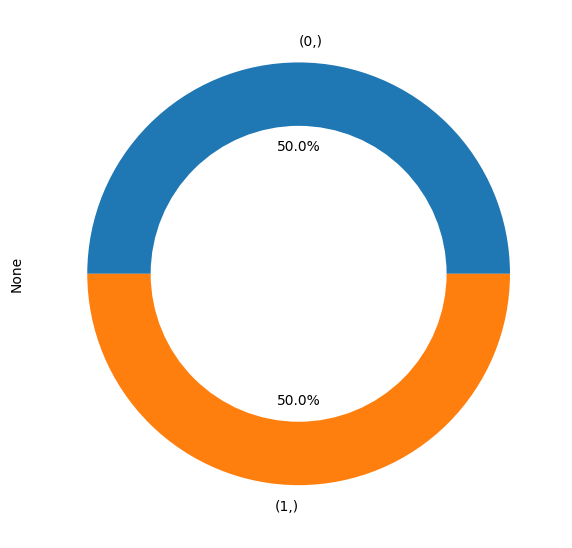

In [69]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [70]:
y_train.value_counts()

flag_kredit_macet
0                    14134
1                    14134
dtype: int64

In [71]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  95.64375605033882
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2821
           1       0.72      0.83      0.77       278

    accuracy                           0.96      3099
   macro avg       0.85      0.90      0.88      3099
weighted avg       0.96      0.96      0.96      3099



In [72]:
hasil = hasil.append(extract_classification_metrics_to_dataframe(y_cv, pred_xgb, model_name = "XGB_oversample_train"), ignore_index=True)


In [73]:
hasil

,Model,Akurasi,Precision_0,Precision_1,Macro_Avg_Precision,Weighted_Avg_Precision,Recall_0,Recall_1,Macro_Avg_Recall,Weighted_Avg_Recall,F1_Score,Macro_Avg_F1,Weighted_Avg_F1
0,NB_onehot_null,0.878993,0.916270,0.198758,0.557514,0.851904,0.954272,0.115108,0.534690,0.878993,0.864097,0.540335,0.864097
1,DTree_onehot_null,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
2,RandomForest_onehot_null,0.912230,0.913933,0.650000,0.781967,0.890257,0.997519,0.046763,0.522141,0.912230,0.876154,0.520573,0.876154
3,XGB_onehot_null,0.911262,0.923768,0.515789,0.719779,0.887170,0.983694,0.176259,0.579976,0.911262,0.890887,0.607762,0.890887
4,XGB_drop_kode_cabang,0.858341,0.924448,0.225256,0.574852,0.861726,0.919532,0.237410,0.578471,0.858341,0.860013,0.576578,0.860013
5,XGB_modus_kode_cabang,0.908358,0.921289,0.465909,0.693599,0.880438,0.983339,0.147482,0.565411,0.908358,0.886063,0.587673,0.886063
6,XGB_oversample_train,0.956438,0.983441,0.722741,0.853091,0.960055,0.968451,0.834532,0.901492,0.956438,0.957834,0.875256,0.957834


## Membuat Model dengan menangani ....

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d43b66c9-546b-4310-9ebd-14779535929d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>